<a href="https://colab.research.google.com/github/carlos20160984/ET5003_SEM1_2021-2/blob/main/ET5003_KaggleCompetition_Carlos_Santiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [ ]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Final #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

# Imports

In [2]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# to resize figures
from matplotlib.pyplot import figure

In [5]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [7]:
!pip install gpy

     |████████████████████████████████| 959 kB 4.1 MB/s 
     |████████████████████████████████| 71 kB 8.4 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565105 sha256=c80e5af4de3562b47d643e5a4617b7fbabb52503664a9fe8cb1d31707fa3c981
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=8e70e6f8b4df49ae4951e458f5e83ae2929d440dbeb122864343100d92d7b088
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [8]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

from sklearn.preprocessing import StandardScaler
import seaborn as sns

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# To find Feature Importnces
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [9]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Load data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
Path = '/content/drive/MyDrive/competition/'

# MNIST Data
train_data = Path + 'HousePrice_Train.csv'
test_data = Path + 'HousePrice_Test.csv'

# train data
train = pd.read_csv(train_data)
test = pd.read_csv(test_data)

# Exploratory Data Analysis (EDA)


In [11]:
# View the first 5 rows of dataset
train.head()


,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [12]:
# Describe the data
test.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,1989.500000,1.231545e+07,2.027066,2.987179,53.350445,-6.252411,132.603530
std,202.794231,1.420680e+05,1.071273,1.198480,0.073961,0.091600,330.347066
min,1639.000000,1.147889e+07,1.000000,1.000000,53.214227,-6.521183,32.100000
25%,1814.250000,1.227637e+07,1.000000,2.000000,53.295225,-6.304258,73.000000
50%,1989.500000,1.237928e+07,2.000000,3.000000,53.341153,-6.247799,99.200000
75%,2164.750000,1.240421e+07,3.000000,4.000000,53.381752,-6.184277,136.875000
max,2340.000000,1.242824e+07,9.000000,14.000000,53.617443,-6.057150,8576.000000


In [13]:
# Create new features from key words in Description
#data['renovated'] = np.where(data.loc[data['Features'].str.contains("renovated", case=False)], 1, 0) 

## Training set
renovated = train['Features'].str.contains("renovated|refurbished|turn key|showhouse", case=False)
attic = train['Features'].str.contains("attic", case=False)
large_garden = train['Features'].str.contains("acre|acres", case=False)
luas_dart = train['Features'].str.contains("luas|dart", case=False)
parking = train['Features'].str.contains("parking|garage", case=False)


train['Renovated']=renovated
train['Attic']=attic
train['Large_garden']=large_garden
train['Luas_dart']=luas_dart
train['Parking']=parking

## Testing set
renovated = test['Features'].str.contains("renovated|refurbished|turn key|showhouse", case=False)
attic = test['Features'].str.contains("attic", case=False)
large_garden = test['Features'].str.contains("acre|acres", case=False)
luas_dart = test['Features'].str.contains("luas|dart", case=False)
parking = test['Features'].str.contains("parking|garage", case=False)

test['Renovated']=renovated
test['Attic']=attic
test['Large_garden']=large_garden
test['Luas_dart']=luas_dart
test['Parking']=parking


In [14]:
train.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price,Renovated,Attic,Large_garden,Luas_dart,Parking
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000,False,False,False,False,False
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000,False,True,False,False,False
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000,False,False,False,False,True
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000,False,True,False,False,True
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000,False,False,False,False,True


In [15]:
# Check for missing values in the training set
print("Count of missing values")
train.isna().sum()

Count of missing values


Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
Renovated           0
Attic               0
Large_garden        0
Luas_dart           0
Parking             0
dtype: int64

In [16]:
# Check for missing values: 
print('% of missing values')
round((train.isna().sum()/len(train))*100,2)

% of missing values


Index             0.00
ID                0.00
Location          0.00
Num_Bathrooms     0.00
Num_Beds          0.00
BER_class        15.32
Description       0.00
Services         64.77
Features          0.00
Latitude          0.00
Longitude         0.00
Type              0.00
Surface           0.00
Price             0.00
Renovated         0.00
Attic             0.00
Large_garden      0.00
Luas_dart         0.00
Parking           0.00
dtype: float64

In [17]:
# Check for missing values in the testing set
print("Count of missing values")
test.isna().sum()

Count of missing values


Index              0
ID                 0
Location           0
Num_Bathrooms      0
Num_Beds           0
BER_class        108
Description        0
Services         456
Features           0
Latitude           0
Longitude          0
Type               0
Surface            0
Renovated          0
Attic              0
Large_garden       0
Luas_dart          0
Parking            0
dtype: int64

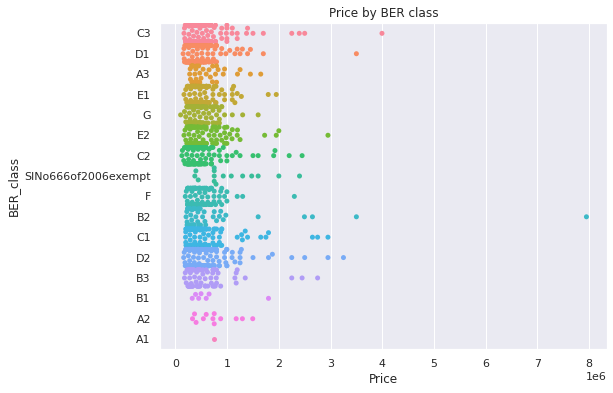

In [18]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.swarmplot(data=train, x='Price', y='BER_class')
plt.title('Price by BER class')
plt.show()

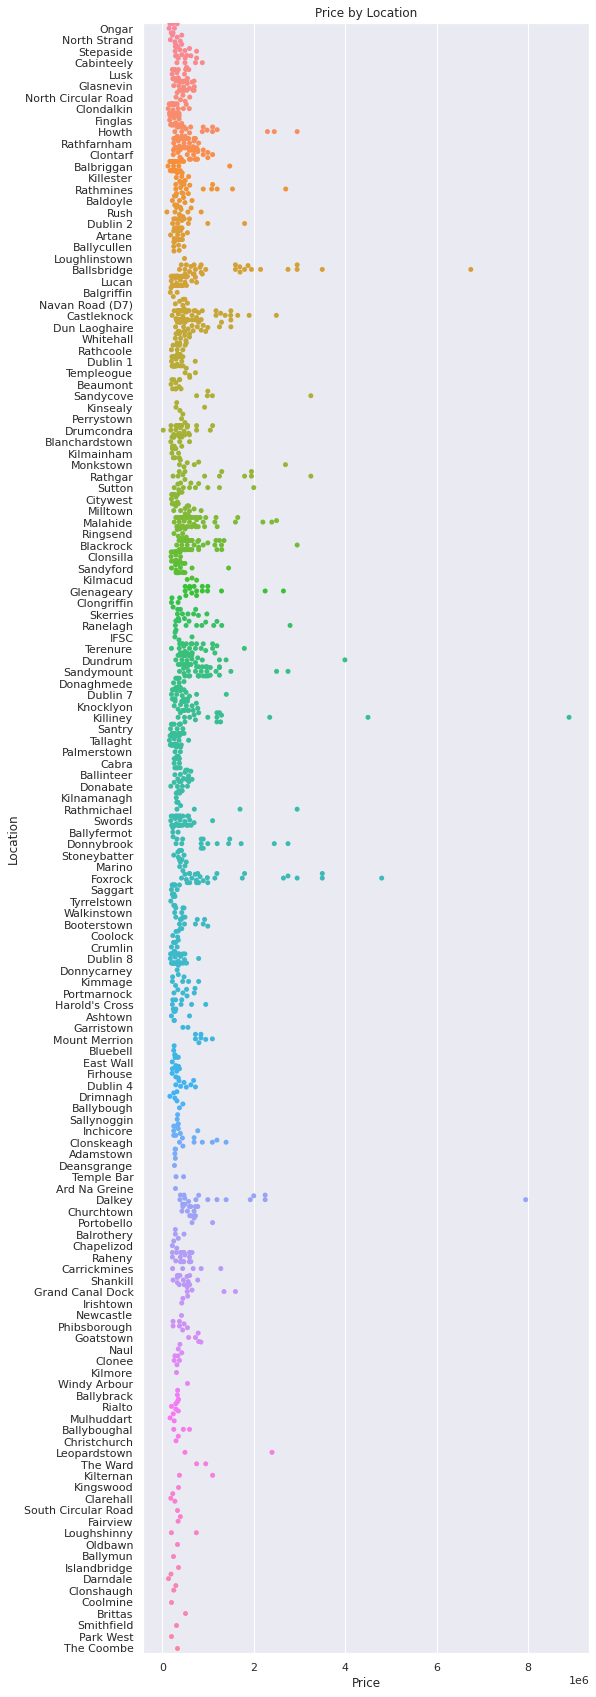

In [19]:
sns.set(rc={'figure.figsize':(8, 30)})
sns.swarmplot(data=train, x='Price', y='Location')
plt.title('Price by Location')
plt.show()

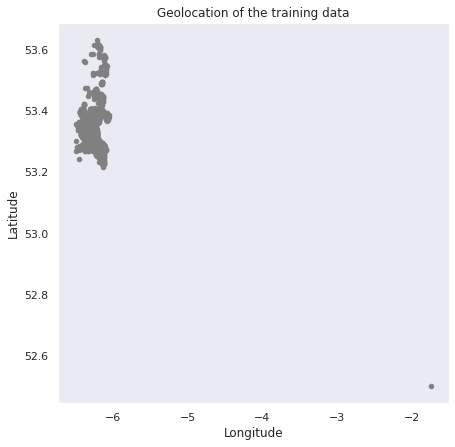

In [20]:
# Geolocation of the training data
train.plot.scatter(x = 'Longitude', y = 'Latitude', figsize = (7,7), color='grey')
plt.title("Geolocation of the training data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

# Data preparation

**Drop meaningless Features:**<br>
* Drop *ID* 

**Convert Categorical Features:**<p>
* Apply one hot encoding to *type* and *Location* 
* Convert *BER classification* into ordinal features

**Missing data:**<p>
* **Services**: drop services as 65% of the instances are NAs.
* **Missing BER**: input the average of BER where missing.

**Outliers/Inconsistent data**<p>
* Remove longitude >-6 as it is not consistent with county Dublin

99.7% of data observed following a normal distribution lies within 3 standard deviations from the mean. We can remove extreme values by deleting the rows where values are above/below the threshold of 3 standard deviations. 

* Remove rows where prices are 3+ standard deviations above/below the mean.
* Remove rows where surfaces are 3+ standard deviations above/below the mean. 


**Drop meaningless Features:**

In [21]:
# Drop columns
train.drop(['ID','Services'], axis=1, inplace=True)
test.drop(['ID','Services'], axis=1, inplace=True)

**Input/drop missing data**

In [22]:
#Convert BER classification into ordinal features
# Map BER categories 
BERMap = {
    "A1": 1,
    "A2": 2,
    "A3": 3,
    "B1": 4,
    "B2": 5,
    "B3": 6,
    "C1": 7,
    "C2": 8,
    "C3": 9,
    "D1": 10,
    "D2": 11,
    "E1": 12,
    "E2": 13,
    "F": 14,
    "G": 15,
    "SINo666of2006exempt" : float("NaN")
}
train['BER_class'] = train['BER_class'].replace(BERMap)
test['BER_class'] = test['BER_class'].replace(BERMap)

In [23]:
ber_mean = round(train['BER_class'].mean(),0)
train['BER_class']

0        9.0
1       10.0
2        3.0
3       12.0
4       10.0
        ... 
1633     8.0
1634     7.0
1635     3.0
1636    11.0
1637    12.0
Name: BER_class, Length: 1638, dtype: float64

In [24]:
# Input mean into missing entries for BER
ber_mean = round(train['BER_class'].mean(),0)
train['BER_class'].fillna(ber_mean, inplace=True)
test['BER_class'].fillna(ber_mean, inplace=True)

**Check train and testing sets for missing values**

In [25]:
# Check for missing values in the training data: total missing
print("Count of missing values")
train.isna().sum()

Count of missing values


Index            0
Location         0
Num_Bathrooms    0
Num_Beds         0
BER_class        0
Description      0
Features         0
Latitude         0
Longitude        0
Type             0
Surface          0
Price            0
Renovated        0
Attic            0
Large_garden     0
Luas_dart        0
Parking          0
dtype: int64

In [26]:
test.isna().sum()

Index            0
Location         0
Num_Bathrooms    0
Num_Beds         0
BER_class        0
Description      0
Features         0
Latitude         0
Longitude        0
Type             0
Surface          0
Renovated        0
Attic            0
Large_garden     0
Luas_dart        0
Parking          0
dtype: int64

**Convert Categorical Features**

In [27]:
# Apply one hot encoding to Type
train = pd.get_dummies(train, columns=['Type'], 
                        dummy_na=False, 
                        drop_first=True)

test = pd.get_dummies(test, columns=['Type'], 
                        dummy_na=False, 
                        drop_first=True)

train = pd.get_dummies(train, columns=['Location'], 
                        dummy_na=False, 
                        drop_first=True)

test = pd.get_dummies(test, columns=['Location'], 
                        dummy_na=False, 
                        drop_first=True)


**Remove outliers**

In [28]:
def remove_outliers(dframe, feature, no_std=3):
    '''Function to Detect / Remove Outliers'''
  
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(dframe[feature])
    random_data_mean = np.mean(dframe[feature])
    anomaly_cut_off = random_data_std * no_std
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    dframe = dframe.drop(dframe[(dframe[feature] < lower_limit) | (dframe[feature] > upper_limit)].index)

    return dframe 

In [29]:
# Remove extreme values for price and surface. We are using 3 stantard deviations as a cut off
train = remove_outliers(train, 'Price', 3)
train = remove_outliers(train, 'Surface', 3)


In [30]:
# Drop  location inconsistent with county Dublin
InconsistentLongitude = train[(train.Longitude > -6) | (train.Latitude < 53)].index
train.drop(InconsistentLongitude, inplace=True)


# Post data cleaning EDA

Pairplots of numerical features


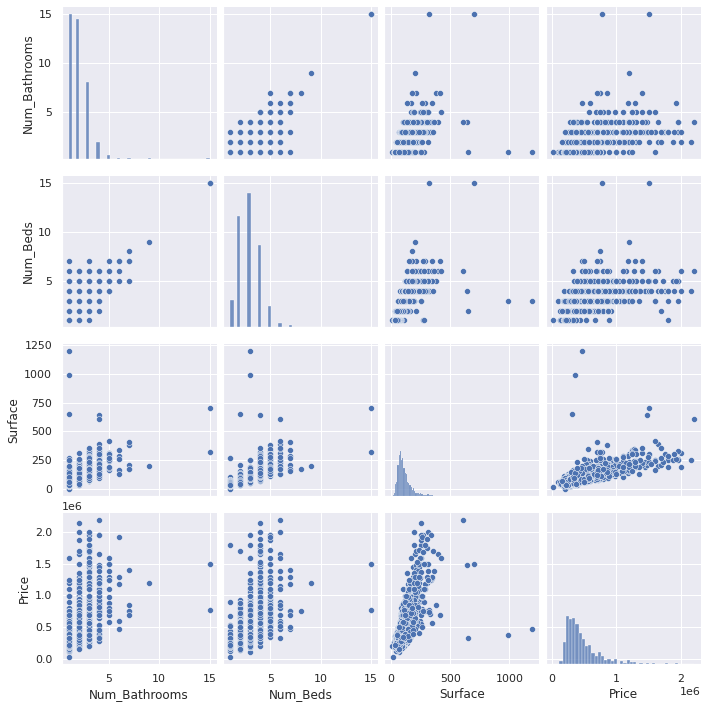

In [31]:
# Pairplot to see the relationship between numerical features. The method dropna() drops all rows with missing values 
print('Pairplots of numerical features')
sns.pairplot(data=train[['Num_Bathrooms','Num_Beds','Surface','Price']].dropna())
plt.show()

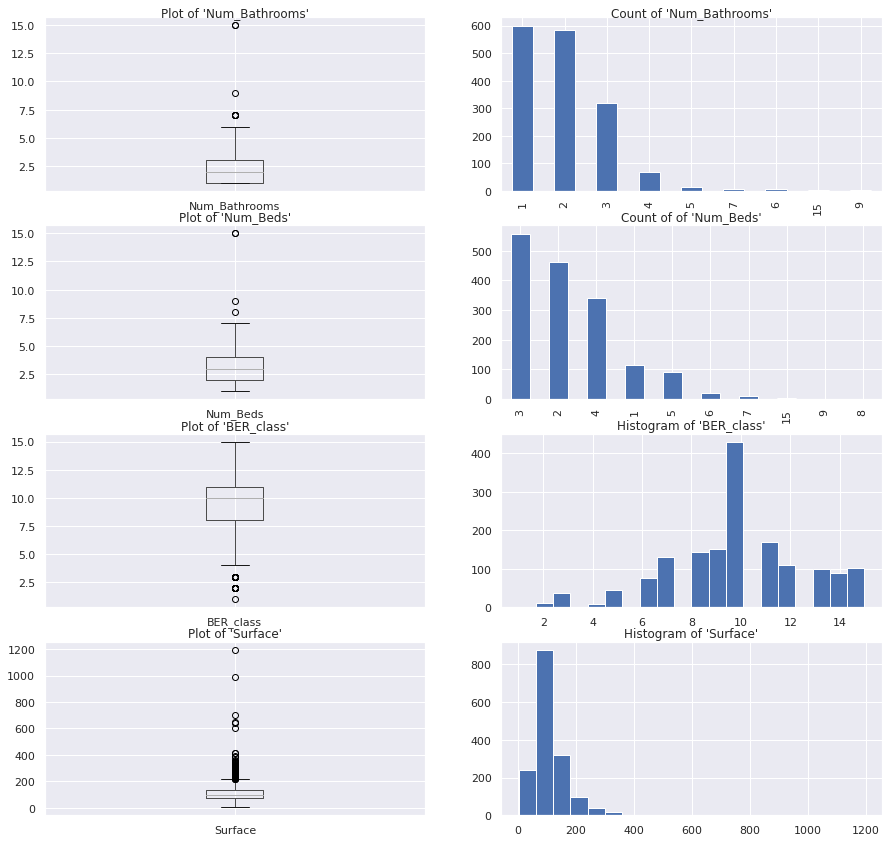

In [32]:
fig = plt.figure(figsize=(15,30))

ax1 = fig.add_subplot(8, 2, 1)
ax1.set_title("Plot of 'Num_Bathrooms'",pad=1)
train.boxplot(column=['Num_Bathrooms'])

ax2 = fig.add_subplot(8, 2, 2)
ax2.set_title("Count of 'Num_Bathrooms'",pad=1)
train['Num_Bathrooms'].value_counts(sort=True).plot(kind='bar')

ax3 = fig.add_subplot(8, 2, 3)
ax3.set_title("Plot of 'Num_Beds'",pad=5)
train.boxplot(column=['Num_Beds'])

ax4 = fig.add_subplot(8, 2, 4)
ax4.set_title("Count of of 'Num_Beds'",pad=5)
train['Num_Beds'].value_counts(sort=True).plot(kind='bar')

ax5 = fig.add_subplot(8, 2, 5)
ax5.set_title("Plot of 'BER_class'",pad=5)
train.boxplot(column=['BER_class'])

ax6 = fig.add_subplot(8, 2, 6)
ax6.set_title("Histogram of 'BER_class'",pad=5)
train['BER_class'].hist(bins=20)

ax7 = fig.add_subplot(8, 2, 7)
ax7.set_title("Plot of 'Surface'",pad=5)
train.boxplot(column=['Surface'])

ax8 = fig.add_subplot(8, 2, 8)
ax8.set_title("Histogram of 'Surface'",pad=5)
train['Surface'].hist(bins=20)

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

## Prepare dataset

In [33]:
# Applying the log transform to the price
ylog = np.log(train['Price'].astype('float'))
ylog.shape
ylog = np.array(ylog).reshape((len(ylog), 1))
ylog.shape
yscaler = StandardScaler().fit(ylog)

In [34]:
train['Log_price'] = ylog
#train.head()

## NPL Processing

In [35]:
# Set up the various components of the NLP processing code

from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


def NLP_processing(df,input_column,output_column):
  '''Set up the various components of the NLP processing code'''
  # 1 removing everything except alphabets
  df[output_column] = df[input_column].str.replace("[^a-zA-Z#]", " ")

  # 2 removing short words
  short_word = 4
  df[output_column] = df[output_column].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))

  # 3 make all text lowercase
  df[output_column] = df[output_column].apply(lambda x: x.lower())



  swords = stopwords.words('english')

  # 5 tokenization
  tokenized_doc = df[output_column].apply(lambda x: x.split())

  # 6 remove stop-words
  tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in swords])


  return df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
clean_text = NLP_processing(train,'Description','Clean_description')
clean_text = NLP_processing(train,'Features','Clean_features')

clean_text_test = NLP_processing(test,'Description','Clean_description')
clean_text_test = NLP_processing(test,'Features','Clean_features')



In [37]:
clean_text[['Description','Clean_description','Features','Clean_features']].head()


,Description,Clean_description,Features,Clean_features
0,DNG are delighted to present to the market no....,delighted present market chipping bedroom apar...,None,
1,13 Northbrook Terrace is a charming red brick ...,northbrook terrace charming brick period seclu...,Bight and Spacious interior\nNumerous original...,bight spacious interior numerous original feat...
2,"Welcome to No. 6 Cotter Close, an immaculately...",welcome cotter close immaculately presented th...,Special Features\nLarge rear garden\nGenerous ...,special features large garden generous street ...
3,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,welcome sycamore enjoying premier address smal...,Wonderful 3 bed detached bungalow. \nAccom...,wonderful detached bungalow accommodation exte...
4,'Four Seasons' comes to the market as a wonder...,seasons comes market wonderful opportunity tho...,Detached Property \nDouble Glazed Windows...,detached property double glazed windows double...


In [38]:
# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer object
cvec = CountVectorizer(lowercase=False)

# convert the documents into a document-term matrix
wm_train = cvec.fit_transform(clean_text['Clean_description'])


# retrieve the terms found in the corpora 
tokens = cvec.get_feature_names()

# convert the documents into a document-term matrix
wm_test = cvec.fit_transform(clean_text_test['Clean_description'])
tokens2 = cvec.get_feature_names()

In [40]:
# create a dataframe from the matrix
word_matrix = wm2df(wm_train, tokens)
word_matrix_test = wm2df(wm_test, tokens2)



In [41]:
word_count= pd.DataFrame(word_matrix.sum(), columns = ['counts'])
top50 = word_count.sort_values('counts', ascending=False)[:50]


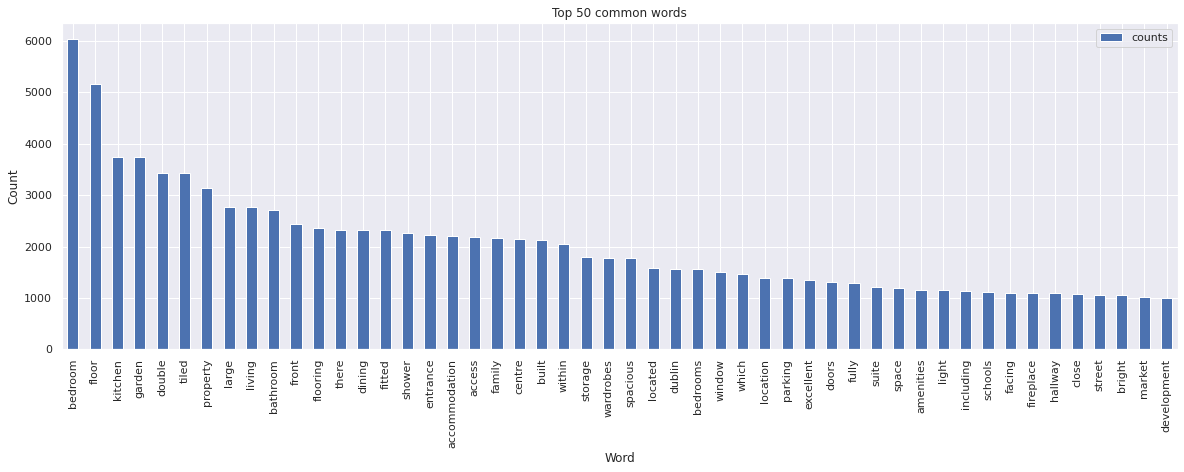

In [42]:
top50.plot(kind='bar',figsize=(20,6), xlabel='Word',ylabel='Count', title='Top 50 common words')


## TfidfVectorizer

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features= 300, max_df=0.5, smooth_idf=True)
print(vectorizer)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=300,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


In [44]:
# Concatenate description and features
X = vectorizer.fit_transform(clean_text['Clean_description'])  
x_test = vectorizer.fit_transform(clean_text_test['Clean_description'])  
X.shape 

(1597, 300)

In [45]:
y = train['Price']
y.shape

(1597,)

In [46]:
#Train the classifier
# create a model
MNB = MultinomialNB()

# fit the training data
MNB.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
 # Probability of a housing being expensive based on description
prob_expensive = MNB.predict_proba(X)
print('Probability of being expensive:',prob_expensive[:,0])

Probability of being expensive: [0.00027949 0.00050003 0.00050542 ... 0.00061875 0.00052579 0.00049943]


In [48]:
# add Probability of a housing being expensive to the dataframe
train['Prob_expensive'] = prob_expensive[:,0]

Generate feature for testing set

In [49]:
 # Probability of a housing being expensive based on description
prob_expensive_test = MNB.predict_proba(x_test)
print('Probability of being expensive:',prob_expensive[:,0])

# add Probability of a housing being expensive to the dataframe
test['Prob_expensive'] = prob_expensive_test[:,0]

Probability of being expensive: [0.00027949 0.00050003 0.00050542 ... 0.00061875 0.00052579 0.00049943]


In [50]:
#from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 0)

# PIECEWISE REGRESSION

# Feature Selection

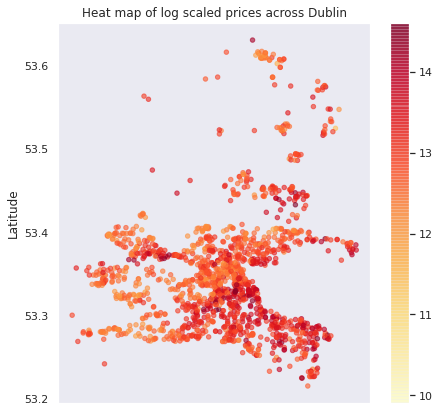

In [51]:
# Log transforming the price to remove heat map sensitivity to outliers
train.plot.scatter(x = 'Longitude', y = 'Latitude', figsize = (7,7), c = np.log(train['Price']), cmap = 'YlOrRd', alpha = 0.6, colorbar = True)
plt.title("Heat map of log scaled prices across Dublin")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

**Summary of Analysis for Feature Selection**

* All properties are located in Co. Dublin
* Prices are highest toward lower latitude and lower longitude meaning that prices are higher toward the coast of South Co. Dublin.
* Beds and bathroom are highly correlated to each other as expected
* Both Bedroom and Bathroom are correlated to Surface as expected
* Surface and Beds have a medium correlation with Price. Scores of 0.66 and 0.56, respectively. All other variables are low correlated (less than 0.5) or no correlation with price. 
* Surface has many outliers even after removing instances where surface value exceed 3 standard deviations from the mean. 

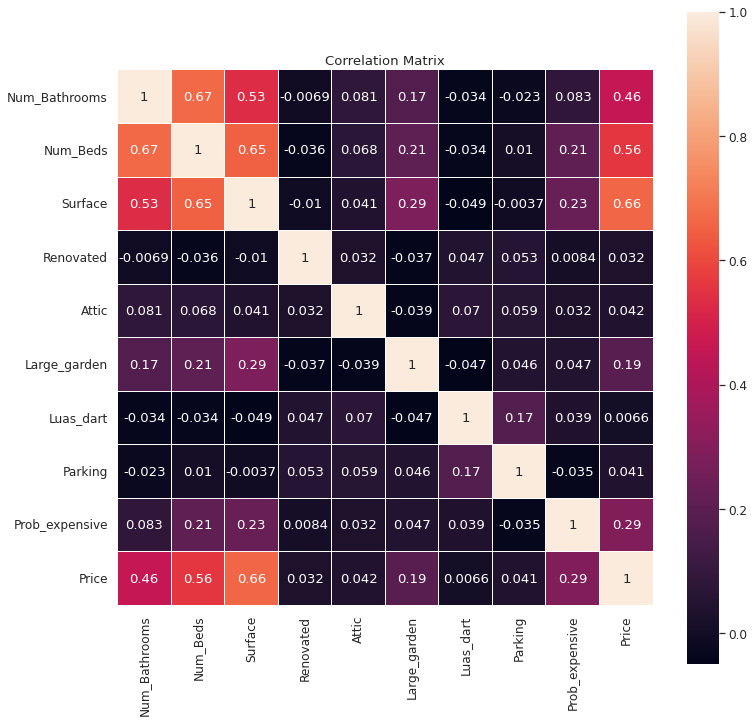

In [52]:
# Check relationships between numerical variables

matrix=train[['Num_Bathrooms','Num_Beds','Surface','Renovated','Attic','Large_garden','Luas_dart','Parking','Prob_expensive','Price']].dropna()

sns.set(font_scale=1.10)
plt.figure(figsize=(12, 12))
plt.title('Correlation Matrix')
sns.heatmap(matrix.corr(),linewidths=0.01,square=True,annot=True)

## Feature Importance with Random Forest

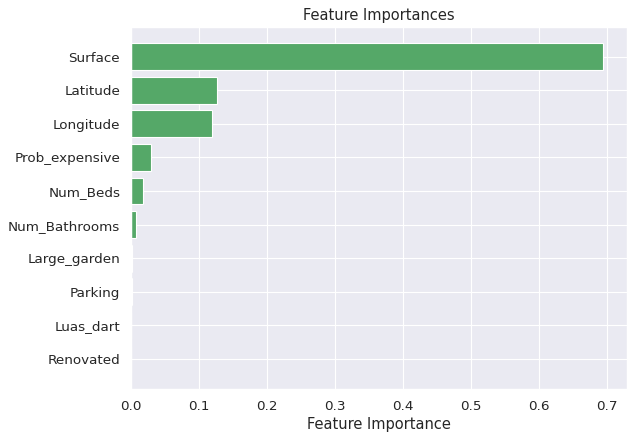

In [53]:
#Determine the most relevant features

figure(figsize=(8, 6), dpi=80)
y = train['Log_price']
X = train[['Num_Bathrooms','Num_Beds','Surface','Renovated','Attic','Large_garden','Luas_dart','Parking','Latitude','Longitude','Prob_expensive']].dropna()

model = RandomForestRegressor(random_state=8, max_depth=8)
model.fit(X,y) 
features = ['Num_Bathrooms','Num_Beds','Surface','Renovated','Attic','Large_garden','Luas_dart','Parking','Latitude','Longitude','Prob_expensive']
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.show()

The features *surface, latutude, longitude* have the highest importance according to Random Forest. Interesting to see that latutude and longitude combined are very powerful for detecting price variations across the county as per the heat map. <br>
Probability of being expensive was created using NLP and it's revealed as the 4th more important features, 

In [54]:
#print('Importance of top 5 features')
#[print("\nfeature: ",features[i],"\n - importance: ",importances[i]) for i in indices]


# Bayesian Model Price Prediction

### Model with 5 features: *beds, surface, latutude, longitude ,and area_Ballsbrige*

In [55]:
# Create a copy of the data
df_train = train
df_test = test

In [56]:
df_train.describe()

,Index,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Surface,Price,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse,Location_Ard Na Greine,Location_Artane,Location_Ashtown,Location_Balbriggan,Location_Baldoyle,Location_Balgriffin,Location_Ballinteer,Location_Ballsbridge,Location_Ballybough,Location_Ballyboughal,Location_Ballybrack,Location_Ballycullen,Location_Ballyfermot,Location_Ballymun,Location_Balrothery,Location_Beaumont,Location_Blackrock,Location_Blanchardstown,Location_Bluebell,Location_Booterstown,Location_Brittas,Location_Cabinteely,Location_Cabra,...,Location_Perrystown,Location_Phibsborough,Location_Portmarnock,Location_Portobello,Location_Raheny,Location_Ranelagh,Location_Rathcoole,Location_Rathfarnham,Location_Rathgar,Location_Rathmichael,Location_Rathmines,Location_Rialto,Location_Ringsend,Location_Rush,Location_Saggart,Location_Sallynoggin,Location_Sandycove,Location_Sandyford,Location_Sandymount,Location_Santry,Location_Shankill,Location_Skerries,Location_Smithfield,Location_South Circular Road,Location_Stepaside,Location_Stoneybatter,Location_Sutton,Location_Swords,Location_Tallaght,Location_Temple Bar,Location_Templeogue,Location_Terenure,Location_The Coombe,Location_The Ward,Location_Tyrrelstown,Location_Walkinstown,Location_Whitehall,Location_Windy Arbour,Log_price,Prob_expensive
count,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1.597000e+03,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,...,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000
mean,817.477771,1.985598,2.973701,9.874139,53.351933,-6.259608,112.791892,4.898132e+05,0.028804,0.126487,0.020664,0.073262,0.283657,0.000626,0.001252,0.186600,0.008766,0.000626,0.010645,0.003757,0.021290,0.006262,0.002505,0.007514,0.015028,0.001252,0.001879,0.002505,0.004383,0.002505,0.000626,0.002505,0.006888,0.024421,0.007514,0.002505,0.006888,0.000626,0.005009,0.006888,...,0.001879,0.004383,0.004383,0.001879,0.013150,0.007514,0.006262,0.028804,0.007514,0.002505,0.010019,0.003131,0.005636,0.006888,0.007514,0.001879,0.002505,0.013776,0.018159,0.010645,0.008766,0.007514,0.000626,0.000626,0.009393,0.008140,0.008766,0.018159,0.024421,0.001252,0.003131,0.016907,0.000626,0.001252,0.003757,0.005009,0.006888,0.000626,12.955096,0.000504
std,472.414795,1.094721,1.195987,2.805261,0.074092,0.091466,71.443390,3.067777e+05,0.167308,0.332502,0.142301,0.260648,0.450913,0.025023,0.035377,0.389712,0.093247,0.025023,0.102656,0.061199,0.144394,0.078908,0.050000,0.086385,0.121703,0.035377,0.043315,0.050000,0.066081,0.050000,0.025023,0.050000,0.082733,0.154400,0.086385,0.050000,0.082733,0.025023,0.070622,0.082733,...,0.043315,0.066081,0.066081,0.043315,0.113951,0.086385,0.078908,0.167308,0.086385,0.050000,0.099622,0.055884,0.074882,0.082733,0.086385,0.043315,0.050000,0.116596,0.133568,0.102656,0.093247,0.086385,0.025023,0.025023,0.096489,0.089884,0.093247,0.133568,0.154400,0.035377,0.055884,0.128962,0.025023,0.035377,0.061199,0.070622,0.082733,0.025023,0.519934,0.000093
min,1.000000,1.000000,1.000000,1.000000,53.215381,-6.497000,3.400000,1.999500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [57]:
# Specify the features we will use to train the model

featrain = ['Latitude', 'Longitude', 'Surface','Prob_expensive','Num_Beds','Num_Bathrooms','Price']
# dropna: remove missing values
df_subset_train = df_train[featrain].dropna(axis=0)

featest = ['Latitude', 'Longitude', 'Surface','Prob_expensive','Num_Beds','Num_Bathrooms']
df_subset_test  =  df_test[featest].dropna(axis=0)

# cost
#df_subset_cost = dfcost[dfcost.index.isin(df_subset_test.index)]

print(df_subset_train.shape)
print(df_subset_test.shape)
#print(df_subset_cost.shape)

(1597, 7)
(702, 6)


In [58]:
# train set, input columns
Xs_full_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_full_train = df_subset_train.iloc[:,-1].values

# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 

print("Xs_train shape:", Xs_full_train.shape)
print("ys_train shape:", ys_full_train.shape)

print("Xs_test shape:", Xs_test.shape)
#print("y_test shape:", y_test.shape)

Xs_train shape: (1597, 6)
ys_train shape: (1597,)
Xs_test shape: (702, 6)


In [59]:
# Separate training data into predictors 'X' and target 'y'

# train set, input columns
X_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
y_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
X_test = df_subset_test.iloc[:,0:].values

In [60]:
#Split the training dataset into training and validation
Xs_train,Xs_val,ys_train,ys_val = train_test_split(Xs_full_train, ys_full_train, test_size=0.2)
ys_train = ys_train.reshape(-1,1)

print("X train shape:", Xs_train.shape)
print("y train shape:", ys_train.shape)
print("X validation shape:", Xs_val.shape)
print("y validation shape:", ys_val.shape)

print("X test shape:", Xs_test.shape)

X train shape: (1277, 6)
y train shape: (1277, 1)
X validation shape: (320, 6)
y validation shape: (320,)
X test shape: (702, 6)


In [61]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

Xss_val = np.hstack([Xs_val,Xs_val[:,[2]]**2])
Xn_val = xscaler.transform(Xss_val)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

#Do dot scale/transform the validation values
yn_val = ys_val

In [62]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,050


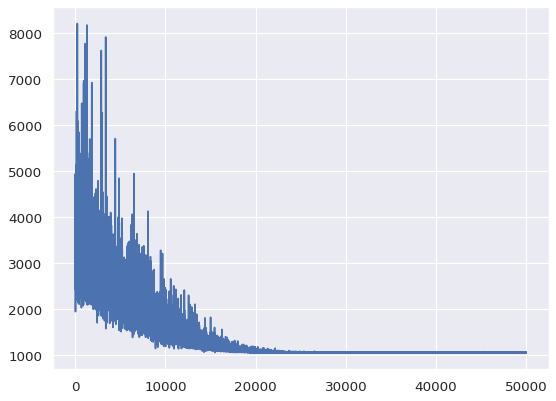

In [63]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
figure(figsize=(8, 6), dpi=80) 
plt.plot(approximation.hist);

In [64]:
# samples from the posterior
posterior = approximation.sample(draws=2000)
print(posterior)

<MultiTrace: 1 chains, 2000 iterations, 4 variables>


In [65]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
#print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
#print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

In [66]:
df_1 = test['Index']
df_2 = pd.DataFrame(y_pred_BLR, columns=['Price_Full'])
full_test_predictions = pd.concat([df_1, df_2], axis=1)
full_test_predictions

,Index,Price_Full
0,1639,350177.013598
1,1640,533830.492746
2,1641,507943.262175
3,1642,862844.658637
4,1643,413614.636176
...,...,...
697,2336,238798.423956
698,2337,285662.928144
699,2338,525836.914424
700,2339,514805.475886


## Piecewise Regression

### Full Model

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

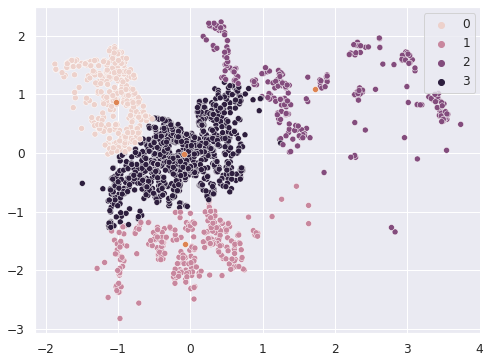

In [67]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)

# clustering by features latitude and longitude
ind=[0,1]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)

plt.figure(figsize=(8,6))
labels = gmm.fit_predict(X_ind)
sns.scatterplot(x=X_ind[:,0], y=X_ind[:,1], hue=gmm.fit_predict(X_ind))
sns.scatterplot(x=gmm.means_[:,0],y=gmm.means_[:,1])


### Clusters

In [68]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 227, 1: 231, 2: 183, 3: 636}

In [69]:

# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 138, 1: 105, 2: 101, 3: 358}

In [70]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)


In [71]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [72]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [73]:

# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

## Piecewise Model

In [74]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 199.88


In [75]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 184.47


In [76]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 167.22


In [77]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 541.64


In [78]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

##Simulations

### Only Cluster 0

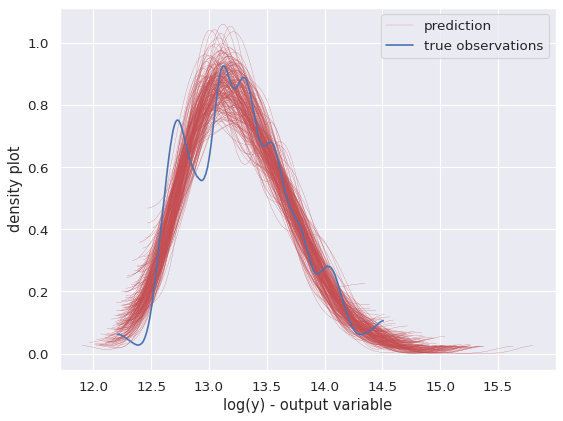

In [79]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))

figure(figsize=(8, 6), dpi=80)

for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 1

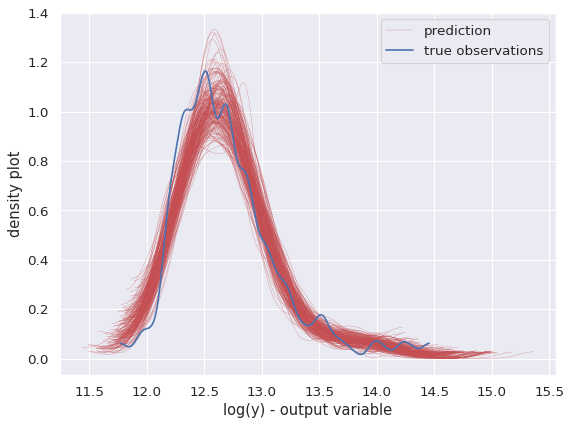

In [80]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))

figure(figsize=(8, 6), dpi=80)


for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 2

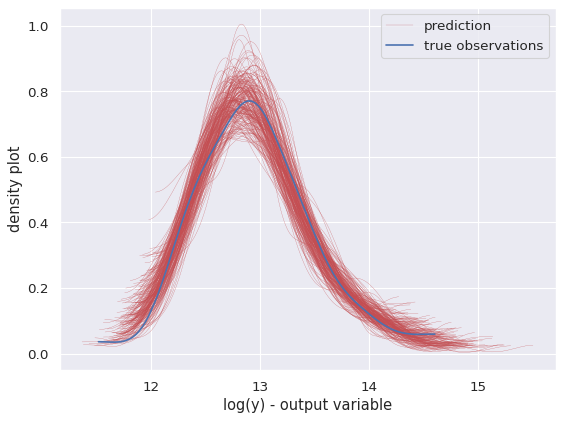

In [81]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))

figure(figsize=(8, 6), dpi=80)

for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 3

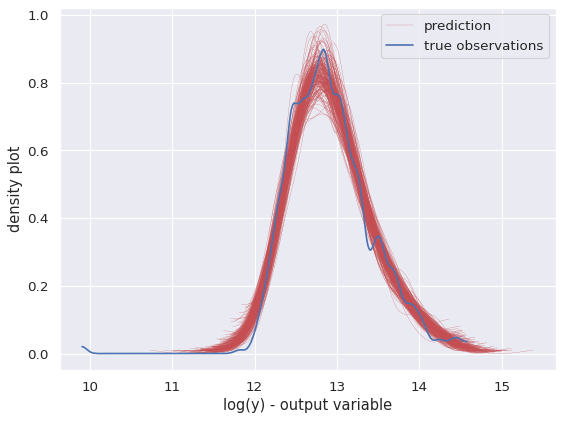

In [82]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))

figure(figsize=(8, 6), dpi=80)

for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Overall

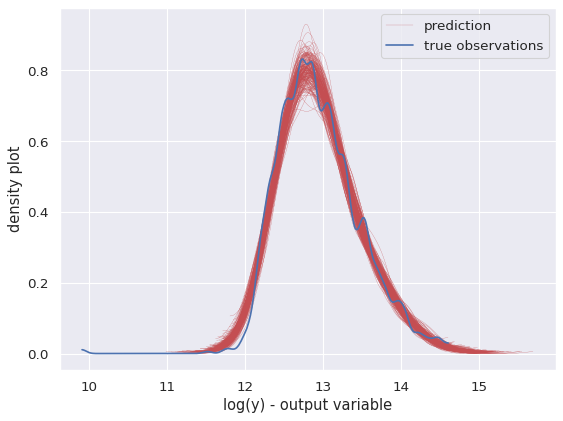

In [83]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

figure(figsize=(8, 6), dpi=80)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)
                  ])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0, ylog1, ylog2, ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Prediction on testing set

In [84]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))

joint=np.hstack([y_pred_BLR0, y_pred_BLR1, y_pred_BLR2, y_pred_BLR3])

In [85]:
# Save predictions to predictions dataframe
df_1 = full_test_predictions
df_2 = pd.DataFrame(joint, columns=['Price_Piecewise'])
full_test_predictions = pd.concat([df_1, df_2], axis=1)
full_test_predictions

,Index,Price_Full,Price_Piecewise
0,1639,350177.013598,510520.759779
1,1640,533830.492746,471728.842416
2,1641,507943.262175,759518.382884
3,1642,862844.658637,411454.806875
4,1643,413614.636176,606181.036437
...,...,...,...
697,2336,238798.423956,474558.736070
698,2337,285662.928144,264568.334822
699,2338,525836.914424,209308.694226
700,2339,514805.475886,242741.477929


# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [86]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])
floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=10,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=10,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [87]:
# this can be slow because there are many parameters

# some parameters
par1 = 30  # start with 100, then use 1000+
par2 = 300 # start with 1000, then use 10000+

# neural network
with neural_network:
    posterior = pm.sample(par1,tune=par2,chains=1)

Only 30 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w_0, w_1]


Sampling 1 chain for 300 tune and 30 draw iterations (300 + 30 draws total) took 138 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.


In [88]:
# we can do instead an approximated inference
param3 = 1000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.01    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 3,597.4


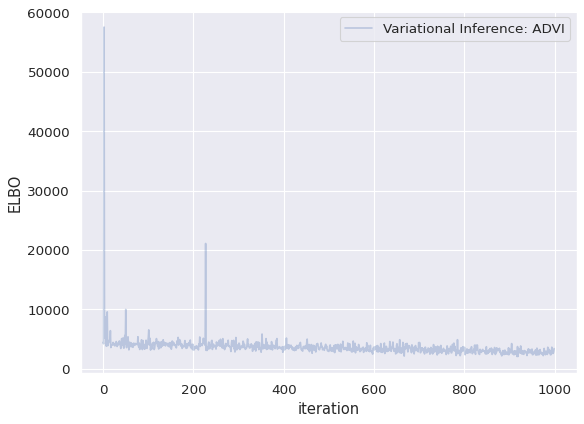

In [89]:
# plot 
figure(figsize=(8, 6), dpi=80)
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [90]:
# draw samples from variational posterior
D = 500
posterior = approx.sample(draws=D)

In [91]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_val.shape[0],1)), Xn_val])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

In [92]:
print("MAE = ",(np.mean(abs(y_pred - ys_val))))
print("MAPE = ",(np.mean(abs(y_pred - ys_val) / ys_val)))

MAE =  511534.599084876
MAPE =  1.000000876287573


In [93]:
# y_pred_final = np.exp(yscaler.inverse_transform(y_pred))

In [94]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)
final_y_pred=np.exp(yscaler.inverse_transform(y_pred))

In [95]:
# Save predictions
df_1 = full_test_predictions.copy()
df_2 = pd.DataFrame(final_y_pred, columns=['Price_NN'])
full_test_predictions = pd.concat([df_1, df_2], axis=1)
full_test_predictions

,Index,Price_Full,Price_Piecewise,Price_NN
0,1639,350177.013598,510520.759779,449546.192225
1,1640,533830.492746,471728.842416,637912.938449
2,1641,507943.262175,759518.382884,573029.841945
3,1642,862844.658637,411454.806875,840933.103938
4,1643,413614.636176,606181.036437,399153.053804
...,...,...,...,...
697,2336,238798.423956,474558.736070,266606.537908
698,2337,285662.928144,264568.334822,335842.706104
699,2338,525836.914424,209308.694226,487448.862163
700,2339,514805.475886,242741.477929,608710.219254


In [96]:
# Save dataset in GoogleDrive
full_test_predictions.to_csv(Path+'ET5003_Kaggle_Carlos_Santiago_20160984.csv',index=True)

# SUMMARY

Your summary here.